# Analyse de données nutritionnelles : nettoyage des données
Important : le fichier `fr.openfoodfacts.org.products.csv` doit se trouver dans le répertoire courant.

## Initialisation

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

pd.options.display.float_format = '{:,.3f}'.format
input_file = 'fr.openfoodfacts.org.products.csv'
output_file = 'off.csv'

## Chargement et inspection sommaire

### Chargement du fichier sous forme de DataFrame

In [2]:
data = pd.read_csv(input_file, delimiter='\t', dtype={'code': object}) # `code` est une chaîne

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(data.info(memory_usage='deep')) # infos sur les données chargées

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 1.7 GB
None


### Liste des colonnes

In [4]:
print(', '.join(data.columns.tolist()))

code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_fr, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_fr, ingredients_text, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_category, main_category_fr, image_url, image_small_url, ene

### Suppressions des colonnes de données d'audit

In [5]:
columns_to_delete = ['created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime']
data.drop(columns=columns_to_delete, inplace=True, errors='ignore')
print(f"{len(columns_to_delete)} colonnes effacées.")

4 colonnes effacées.


### Examen des colonnes avec valeurs manquantes

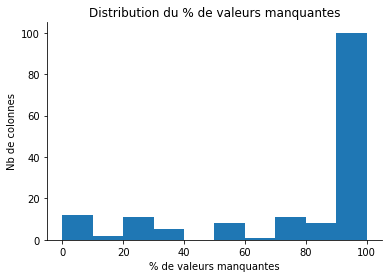

In [6]:
missing_values = data.isnull().sum(axis=0).to_frame(name='count_missing') # nb de valeurs manquantes par colonn
missing_values.sort_values(by=['count_missing'], inplace=True) # tri pour l'affichage
missing_values['percent_missing'] = missing_values['count_missing'] / len(data) * 100 # calcul du %
fig, axes = plt.subplots()
axes.hist(missing_values['percent_missing'], bins=10);
axes.set_title('Distribution du % de valeurs manquantes');
axes.set_xlabel('% de valeurs manquantes');
axes.set_ylabel('Nb de colonnes');
sns.despine(ax=axes)

In [7]:
print(f"Colonnes ne contenant aucune valeur :")
display(missing_values[missing_values['count_missing'] == len(data)])

Colonnes ne contenant aucune valeur :


,count_missing,percent_missing
ingredients_from_palm_oil,320772,100.000
chlorophyl_100g,320772,100.000
lignoceric-acid_100g,320772,100.000
cerotic-acid_100g,320772,100.000
melissic-acid_100g,320772,100.000
glycemic-index_100g,320772,100.000
elaidic-acid_100g,320772,100.000
mead-acid_100g,320772,100.000
erucic-acid_100g,320772,100.000
nervonic-acid_100g,320772,100.000


In [8]:
columns_to_delete = missing_values[missing_values['count_missing'] == len(data)].index.values
data.drop(columns=columns_to_delete, inplace=True, errors='ignore') 
missing_values.drop(index=columns_to_delete, inplace=True) # ignore colonnes vides dans la suite de l'analyse
print(f"{len(columns_to_delete)} colonnes effacées.")

16 colonnes effacées.


In [9]:
threshold = 20 
print(f"Colonnes avec moins de {threshold}% valeurs manquantes :")
display(missing_values[missing_values['percent_missing'] < threshold])

Colonnes avec moins de 20% valeurs manquantes :


,count_missing,percent_missing
creator,2,0.001
code,23,0.007
url,23,0.007
states,46,0.014
states_tags,46,0.014
states_fr,46,0.014
countries_tags,280,0.087
countries,280,0.087
countries_fr,280,0.087
product_name,17762,5.537


In [10]:
threshold = 99.99
print(f"Colonnes avec plus de {threshold}% valeurs manquantes :")
display(missing_values[missing_values['percent_missing'] > threshold])

Colonnes avec plus de 99.99% valeurs manquantes :


,count_missing,percent_missing
taurine_100g,320743,99.991
casein_100g,320745,99.992
glucose_100g,320746,99.992
arachidic-acid_100g,320748,99.993
gamma-linolenic-acid_100g,320748,99.993
cities,320749,99.993
behenic-acid_100g,320749,99.993
dihomo-gamma-linolenic-acid_100g,320749,99.993
omega-9-fat_100g,320751,99.993
chromium_100g,320752,99.994


### Suppressions des colonnes contenant moins de 200 valeurs
Nous renonçons à exploiter les colonnes qui contiennent trop peu de données. La valeur de seuil retenue est arbitraire, et nous serons peut-être amenés à la modifier. 

In [11]:
columns_to_delete = missing_values[missing_values['count_missing'] > len(data) - 200].index
print(', '.join(columns_to_delete))
data.drop(columns=columns_to_delete, inplace=True, errors='ignore') 
print(f"{len(columns_to_delete)} colonnes effacées.")

omega-6-fat_100g, alpha-linolenic-acid_100g, collagen-meat-protein-ratio_100g, chloride_100g, linoleic-acid_100g, bicarbonate_100g, fluoride_100g, docosahexaenoic-acid_100g, caffeine_100g, sucrose_100g, ph_100g, eicosapentaenoic-acid_100g, fructose_100g, silica_100g, beta-carotene_100g, taurine_100g, casein_100g, glucose_100g, arachidic-acid_100g, gamma-linolenic-acid_100g, cities, behenic-acid_100g, dihomo-gamma-linolenic-acid_100g, omega-9-fat_100g, chromium_100g, allergens_fr, serum-proteins_100g, gondoic-acid_100g, oleic-acid_100g, maltodextrins_100g, molybdenum_100g, nucleotides_100g, arachidonic-acid_100g, maltose_100g, lauric-acid_100g, capric-acid_100g, caprylic-acid_100g, myristic-acid_100g, palmitic-acid_100g, stearic-acid_100g, montanic-acid_100g
41 colonnes effacées.


### Liste des colonnes normalisées (avec le suffixe '_tags')

In [12]:
tags_cols = [col for col in data.columns if '_tags' in col] # list de colonnes terminant par '_tags'
print(', '.join(tags_cols))
print(f"({len(tags_cols)} colonnes trouvées)")

packaging_tags, brands_tags, categories_tags, origins_tags, manufacturing_places_tags, labels_tags, emb_codes_tags, cities_tags, countries_tags, traces_tags, additives_tags, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_tags, states_tags
(14 colonnes trouvées)


In [13]:
raw_cols = [col[:-5] for col in tags_cols if col[:-5] in data.columns]
for col in raw_cols:
    s = data.groupby([col, col+'_tags']).size().sort_values(ascending=False)
    print(f"Valeur la plus courante pour {col}: {s.index[0]} {s[0]}")

Valeur la plus courante pour packaging: ('Carton', 'carton') 2153
Valeur la plus courante pour brands: ('Carrefour', 'carrefour') 2978
Valeur la plus courante pour categories: ('Snacks sucrés,Biscuits et gâteaux,Biscuits', 'en:sugary-snacks,en:biscuits-and-cakes,en:biscuits') 293
Valeur la plus courante pour origins: ('France', 'france') 5171
Valeur la plus courante pour manufacturing_places: ('France', 'france') 9371
Valeur la plus courante pour labels: ('Organic, EU Organic, fr:AB Agriculture Biologique', 'en:organic,en:eu-organic,fr:ab-agriculture-biologique') 3220
Valeur la plus courante pour emb_codes: ('EMB 56251E', 'emb-56251e') 218
Valeur la plus courante pour countries: ('US', 'en:united-states') 169928
Valeur la plus courante pour traces: ('Fruits à coque', 'en:nuts') 1240
Valeur la plus courante pour additives: (' [ semolina -> en:semolina  ]  [ wheat -> en:wheat  ]  [ durum-flour -> en:durum-flour  ]  [ flour -> en:flour  ]  [ wheat -> en:wheat  ]  [ niacin -> en:e375  -> e

### Nous décidons de ne conserver que la version normalisée de chaque colonne

In [14]:
data.drop(columns=raw_cols, inplace=True, errors='ignore') 
print(f"{len(raw_cols)} colonnes effacées.")

11 colonnes effacées.


## Examen des colonnes hors informations nutritionnelles

In [15]:
# liste des colonnes que nous déciderons d'effacer
columns_to_be_deleted = []
# fonction d'affichage de renseignements sur une colonne donnée
def print_col_info(column):
    if column in data.columns:
        num_na = data[column].isnull().sum()
        print(f"Nombre d'entrées manquantes : {num_na} ({num_na/len(data)*100:0.2f}%)")
        #unique_vals = data[[column]].groupby(column).size().sort_values(ascending=False)
        unique_vals = data[column].value_counts()
        num_samples = 10
        print("Valeurs les plus courantes : " + ' ; '.join(str(x) for x in unique_vals.iloc[:num_samples].index))

### Marque

In [16]:
print_col_info('brands_tags')

Nombre d'entrées manquantes : 28420 (8.86%)
Valeurs les plus courantes : carrefour ; auchan ; u ; meijer ; leader-price ; casino ; kroger ; ahold ; spartan ; roundy-s


Cet attribut, bien qu'a priori sans lien direct avec la qualité nutritionnelle du produit, pourrait toutefois présenter une corrélation avec sa qualité. Nous le conservons donc, après amélioration du format.

In [17]:
data['brands_tags'] = data['brands_tags'].str.title() # capitalise les débuts de mots

Pour de nombreuses entrées, `brands_tags` est constitué de plusieurs marques (ou sous-marques) séparées par des virgules. Nous décidons de stocker le premier élément de cette liste dans un nouvel attribut `main_brand`.

In [18]:
data['main_brand'] = data['brands_tags'].str.split(pat=',').str[0]

### Conditionnement

In [19]:
print_col_info('packaging_tags')

Nombre d'entrées manquantes : 241811 (75.38%)
Valeurs les plus courantes : sachet,plastique ; carton ; plastique ; barquette,plastique ; bouteille,verre ; conserve ; bouteille,plastique ; bocal,verre ; kunststoff ; carton,plastique


In [20]:
print_col_info('quantity')

Nombre d'entrées manquantes : 215953 (67.32%)
Valeurs les plus courantes : 500 g ; 200 g ; 250 g ; 100 g ; 400 g ; 300 g ; 150 g ; 1 l ; 1 kg ; 125 g


In [21]:
print_col_info('serving_size')

Nombre d'entrées manquantes : 109441 (34.12%)
Valeurs les plus courantes : 240 ml (8 fl oz) ; 28 g (1 oz) ; 28 g (1 ONZ) ; 15 ml (1 Tbsp) ; 30 g (2 Tbsp) ; 30 g ; 30 g (0.25 cup) ; 240 ml (1 cup) ; 14 g (1 Tbsp) ; 30 ml (2 Tbsp)


La qualité nutritionnel d'un produit est indépendante de son conditionnement : ces colonnes ne nous serons donc pas utiles.

In [22]:
columns_to_be_deleted.extend(['packaging_tags', 'quantity', 'serving_size'])

### Lieux de vente

In [23]:
print_col_info('stores')

Nombre d'entrées manquantes : 269050 (83.88%)
Valeurs les plus courantes : Carrefour ; Auchan ; Leclerc ; Cora ; Intermarché ; Lidl ; Franprix ; Aldi ; Super U ; Casino


In [24]:
print_col_info('countries_tags')

Nombre d'entrées manquantes : 280 (0.09%)
Valeurs les plus courantes : en:united-states ; en:france ; en:switzerland ; en:germany ; en:spain ; en:united-kingdom ; en:belgium ; en:australia ; en:russia ; en:france,en:switzerland


In [25]:
print_col_info('countries_fr')

Nombre d'entrées manquantes : 280 (0.09%)
Valeurs les plus courantes : États-Unis ; France ; Suisse ; Allemagne ; Espagne ; Royaume-Uni ; Belgique ; Australie ; Russie ; France,Suisse


In [26]:
print_col_info('purchase_places')

Nombre d'entrées manquantes : 262579 (81.86%)
Valeurs les plus courantes : France ; Lyon,France ; Courrières,France ; Madrid,España ; Paris,France ; España ; Rennes,France ; Deutschland ; Liverpool,United Kingdom ; France,Nantes


Ces attributs ne nous renseignent pas sur la qualité du produit.

In [27]:
columns_to_be_deleted.extend(['stores', 'countries_tags', 'countries_fr', 'purchase_places'])

### Source des données

In [28]:
print_col_info('creator')

Nombre d'entrées manquantes : 2 (0.00%)
Valeurs les plus courantes : usda-ndb-import ; openfoodfacts-contributors ; kiliweb ; date-limite-app ; openfood-ch-import ; tacite ; sebleouf ; tacinte ; javichu ; stephane


Cet attribut n'est pas nécessaire à notre projet. 

Il est toutefois probable qu'il existe une corrélation entre source et qualité des données ; nous pourrions donc être amenés à le rétablir.

In [29]:
columns_to_be_deleted.append('creator')

### Description du produit

In [30]:
print_col_info('product_name')

Nombre d'entrées manquantes : 17762 (5.54%)
Valeurs les plus courantes : Ice Cream ; Extra Virgin Olive Oil ; Potato Chips ; Premium Ice Cream ; Tomato Ketchup ; Beef Jerky ; Pinto Beans ; Popcorn ; Cookies ; Salsa


In [31]:
print_col_info('generic_name')

Nombre d'entrées manquantes : 267977 (83.54%)
Valeurs les plus courantes : Pâtes alimentaires au blé dur de qualité supérieure ; Aliment pour bébés ; Pâtes alimentaires de qualité supérieure ; Jambon cuit supérieur ; Jus d'orange ; Fromage industriel de France, à pâte molle à croûte fleurie, au lait pasteurisé de vache ; Plat préparé en conserve ; Natürliches Mineralwasser mit Kohlensäure versetzt ; Lait demi-écrémé stérilisé UHT ; Chocolat noir


In [32]:
print_col_info('categories_tags')

Nombre d'entrées manquantes : 236383 (73.69%)
Valeurs les plus courantes : en:sugary-snacks,en:biscuits-and-cakes,en:biscuits ; en:sugary-snacks,en:chocolates,en:dark-chocolates ; en:sugary-snacks,en:confectioneries,en:candies ; en:plant-based-foods-and-beverages,en:plant-based-foods,en:breakfasts,en:cereals-and-potatoes,en:cereals-and-their-products,en:breakfast-cereals ; en:sugary-snacks,en:biscuits-and-cakes,en:biscuits,en:chocolate-biscuits ; en:salty-snacks,en:appetizers,en:crackers ; en:dairies,en:yogurts ; en:sugary-snacks,en:chocolates,en:milk-chocolates ; en:sugary-snacks,en:chocolates ; en:groceries,en:sauces


In [33]:
print_col_info('categories_fr')

Nombre d'entrées manquantes : 236361 (73.69%)
Valeurs les plus courantes : Snacks sucrés,Biscuits et gâteaux,Biscuits ; Snacks sucrés,Chocolats,Chocolats noirs ; Snacks sucrés,Confiseries,Bonbons ; Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner ; Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat ; Snacks salés,Apéritif,Biscuits apéritifs ; Produits laitiers,Yaourts ; Snacks sucrés,Chocolats,Chocolats au lait ; Snacks sucrés,Chocolats ; Epicerie,Sauces


In [34]:
print_col_info('main_category')

Nombre d'entrées manquantes : 236406 (73.70%)
Valeurs les plus courantes : en:beverages ; en:groceries ; en:chocolates ; en:plant-based-foods-and-beverages ; en:canned-foods ; en:biscuits ; en:meals ; en:sugary-snacks ; en:frozen-foods ; en:breakfasts


In [35]:
# Nous gardons une trace de la répartition des produits parmi les principales catégories
orig_top_categories = data['main_category'].value_counts().head(15)
orig_top_categories.index = orig_top_categories.index.str[3:]

In [36]:
print_col_info('main_category_fr')

Nombre d'entrées manquantes : 236406 (73.70%)
Valeurs les plus courantes : Boissons ; Epicerie ; Chocolats ; Aliments et boissons à base de végétaux ; Conserves ; Biscuits ; Plats préparés ; Snacks sucrés ; Surgelés ; Petit-déjeuners


In [37]:
print_col_info('pnns_groups_1')

Nombre d'entrées manquantes : 229259 (71.47%)
Valeurs les plus courantes : unknown ; Sugary snacks ; Beverages ; Milk and dairy products ; Cereals and potatoes ; Fish Meat Eggs ; Composite foods ; Fruits and vegetables ; Fat and sauces ; Salty snacks


In [38]:
print_col_info('pnns_groups_2')

Nombre d'entrées manquantes : 226281 (70.54%)
Valeurs les plus courantes : unknown ; One-dish meals ; Sweets ; Biscuits and cakes ; Non-sugared beverages ; Cereals ; Cheese ; Dressings and sauces ; Milk and yogurt ; Processed meat


Nous ne conservons pour notre analyse que les attributs `product_name` et `main_category`, seuls facilement exploitables. Ce dernier permettra une comparaison avec des produits similaires, donc un classement.

In [39]:
columns_to_be_deleted.extend(['generic_name', 'categories_tags', 'categories_fr', 
                             'main_category_fr', 'pnns_groups_1', 'pnns_groups_2'])

### Lieu de production ou de conditionnement

In [40]:
print_col_info('origins_tags')

Nombre d'entrées manquantes : 298619 (93.09%)
Valeurs les plus courantes : france ; union-europeenne ; espana ; italie ; espagne ; australia ; deutschland ; belgique ; agricultura-ue,agricultura-no-ue ; suisse


In [41]:
print_col_info('manufacturing_places_tags')

Nombre d'entrées manquantes : 284277 (88.62%)
Valeurs les plus courantes : france ; italie ; deutschland ; belgique ; suisse ; allemagne ; australia ; espagne ; united-kingdom ; france,bretagne


In [42]:
print_col_info('emb_codes_tags')

Nombre d'entrées manquantes : 291469 (90.86%)
Valeurs les plus courantes : emb-56251e ; fr-85-154-002-ec ; emb-49331h ; fr-72-264-002-ec ; fr-29-247-022-ec ; emb-45273 ; fr-22-046-001-ec ; fr-62-767-005-ec ; fr-40-261-001-ec ; fr-72-181-001-ec


In [43]:
print_col_info('first_packaging_code_geo') # coordonnées du lieu de conditionnement

Nombre d'entrées manquantes : 301969 (94.14%)
Valeurs les plus courantes : 47.633333,-2.666667 ; 47.833333,-0.333333 ; 49.266667,-0.666667 ; 48.1,-4.333333 ; 46.698333,-1.939444 ; 47.933333,-4.016667 ; 46.666667,-0.85 ; 47.866667,2.116667 ; 46.783333,-0.833333 ; 48,-4.1


In [44]:
print_col_info('cities_tags')

Nombre d'entrées manquantes : 300452 (93.67%)
Valeurs les plus courantes : theix-morbihan-france ; douarnenez-finistere-france ; sable-sur-sarthe-sarthe-france ; saint-martin-des-entrees-calvados-france ; mouilleron-en-pareds-vendee-france ; saint-evarzec-finistere-france ; quimper-finistere-france ; chateaubourg-ille-et-vilaine-france ; saint-denis-de-l-hotel-loiret-france ; pouzauges-vendee-france


Ces attributs pourraient être utile dans le cadre d'une démarche écologique de limitation du transport des produits, ce qui n'est pas notre cas.

In [45]:
columns_to_be_deleted.extend(['origins_tags', 'manufacturing_places_tags', 'emb_codes_tags', 
                              'first_packaging_code_geo', 'cities_tags'])

### Certifications

In [46]:
print_col_info('labels_tags')

Nombre d'entrées manquantes : 274128 (85.46%)
Valeurs les plus courantes : en:organic,en:eu-organic,fr:ab-agriculture-biologique ; en:green-dot ; en:vegetarian,en:vegan ; en:green-dot,fr:eco-emballages ; en:organic,en:eu-organic,en:fr-bio-01,fr:ab-agriculture-biologique ; en:gluten-free ; en:labels-of-distributors,fr:selection-intermarche ; en:pdo ; en:no-colorings,en:no-preservatives ; en:vegetarian


In [47]:
print_col_info('labels_fr')

Nombre d'entrées manquantes : 274106 (85.45%)
Valeurs les plus courantes : Bio,Bio européen,AB Agriculture Biologique ; Point Vert ; Végétarien,Végétalien ; Point Vert,Eco-emballages ; Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique ; Sans gluten ; Labels de distributeurs,Sélection Intermarché ; AOP ; Sans colorants,Sans conservateurs ; Végétarien


Certains de ces labels sont des indicateurs de qualité sur lesquels nous pourrons nous appuyer : nous conservons la 1ère colonne, mais pas la 2e (redondante).

In [48]:
columns_to_be_deleted.append('labels_fr')

In [49]:
data['carbon-footprint_100g'] = data['carbon-footprint_100g'].round(2) # arrondissons à 2 décimales
print_col_info('carbon-footprint_100g')

Nombre d'entrées manquantes : 320504 (99.92%)
Valeurs les plus courantes : 0.0 ; 828.0 ; 160.0 ; 150.0 ; 153.0 ; 345.0 ; 365.0 ; 130.0 ; 312.0 ; 340.0


L'empreinte carbone d'un aliment est sens lien avec ses qualités nutritionnelles : à effacer.

In [50]:
columns_to_be_deleted.append('carbon-footprint_100g')

### Informations techniques

In [51]:
print_col_info('url')

Nombre d'entrées manquantes : 23 (0.01%)
Valeurs les plus courantes : http://world-fr.openfoodfacts.org/produit/3350033307988/cookies-monoprix ; http://world-fr.openfoodfacts.org/produit/0853826003614/banana-and-mango-baby-food-up-up ; http://world-fr.openfoodfacts.org/produit/0072940113317/petite-diced-tomatoes-green-chillies-red-gold ; http://world-fr.openfoodfacts.org/produit/7610900117871/energy-milk-strawberry-emmi ; http://world-fr.openfoodfacts.org/produit/0070970472923/original-fruits-chewy-assorted-fruit-flavored-candies-cherry-lemon-strawberry-lime-orange-mike-and-ike ; http://world-fr.openfoodfacts.org/produit/0011535505755/organic-juice-beverage-wild-harvest ; http://world-fr.openfoodfacts.org/produit/5400247026323/beurre-doux-82-m-g-winny ; http://world-fr.openfoodfacts.org/produit/0053600103138/earth-wise-fruit-juice-beverage-pomegranate-blueberry-johanna-foods-inc ; http://world-fr.openfoodfacts.org/produit/0610546453989/bit-o-honey-king-henry-s ; http://world-fr.openfoo

In [52]:
print_col_info('image_url')

Nombre d'entrées manquantes : 244936 (76.36%)
Valeurs les plus courantes : http://fr.openfoodfacts.org/images/products/335/003/020/5041/front.5.400.jpg ; http://fr.openfoodfacts.org/images/products/338/739/038/6172/front.5.400.jpg ; http://fr.openfoodfacts.org/images/products/085/988/800/0127/front.3.400.jpg ; http://fr.openfoodfacts.org/images/products/327/019/017/8941/front.14.400.jpg ; http://fr.openfoodfacts.org/images/products/691/876/895/1684/front.6.400.jpg ; http://fr.openfoodfacts.org/images/products/062/902/541/0009/front.3.400.jpg ; http://fr.openfoodfacts.org/images/products/324/541/186/8130/front.24.400.jpg ; http://fr.openfoodfacts.org/images/products/801/759/601/3064/front.9.400.jpg ; http://fr.openfoodfacts.org/images/products/20209094/front.6.400.jpg ; http://fr.openfoodfacts.org/images/products/322/247/290/2782/front.13.400.jpg


In [53]:
print_col_info('image_small_url')

Nombre d'entrées manquantes : 244936 (76.36%)
Valeurs les plus courantes : http://fr.openfoodfacts.org/images/products/761/303/531/1961/front.7.200.jpg ; http://fr.openfoodfacts.org/images/products/842/294/740/0033/front.8.200.jpg ; http://fr.openfoodfacts.org/images/products/345/179/040/0810/front.4.200.jpg ; http://fr.openfoodfacts.org/images/products/360/858/000/6091/front.3.200.jpg ; http://fr.openfoodfacts.org/images/products/085/343/400/2344/front.3.200.jpg ; http://fr.openfoodfacts.org/images/products/377/000/232/7302/front.3.200.jpg ; http://fr.openfoodfacts.org/images/products/347/322/002/0023/front.7.200.jpg ; http://fr.openfoodfacts.org/images/products/356/470/711/1546/front.9.200.jpg ; http://fr.openfoodfacts.org/images/products/326/385/051/5019/front.5.200.jpg ; http://fr.openfoodfacts.org/images/products/871/256/624/8186/front.11.200.jpg


In [54]:
print_col_info('states_tags')

Nombre d'entrées manquantes : 46 (0.01%)
Valeurs les plus courantes : en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded ; en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded ; en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uplo

Attributs inutiles pour notre projet.

In [55]:
columns_to_be_deleted.extend(['url', 'image_url', 'image_small_url', 'states_tags', 'states_fr'])

## Examen des colonnes d'informations nutritionnelles non quantitatives

In [56]:
print_col_info('ingredients_text')

Nombre d'entrées manquantes : 71810 (22.39%)
Valeurs les plus courantes : Carbonated water, natural flavor. ; Almonds. ; Extra virgin olive oil. ; Extra virgin olive oil ; Semolina (wheat), durum flour (wheat), niacin, ferrous sulfate (iron), thiamin mononitrate, riboflavin, folic acid. ; Honey ; Walnuts. ; Pecans. ; Green beans, water, salt. ; Honey.


Attribut potentiellement utile, mais difficilement exploitable en l'état : nous le supprimons (à discuter avec le client).

In [57]:
columns_to_be_deleted.append('ingredients_text')

In [58]:
print_col_info('allergens')

Nombre d'entrées manquantes : 292428 (91.16%)
Valeurs les plus courantes : blé ; Lait ; lait ; soja ; sulfites ; céleri ; Lait, lait ; orge ; lactose ; blé, blé


Attribut inutile pour notre étude, mais qu'il serait probablement judicieux d'inclure à titre informatif dans les recettes.

In [59]:
columns_to_be_deleted.append('allergens')

In [60]:
print_col_info('traces_tags')

Nombre d'entrées manquantes : 296443 (92.42%)
Valeurs les plus courantes : en:nuts ; en:milk ; en:eggs ; en:gluten ; en:nuts,en:peanuts ; en:milk,en:nuts ; en:nuts,en:soybeans ; en:soybeans ; en:sulphur-dioxide-and-sulphites ; en:gluten,en:nuts


In [61]:
print_col_info('traces_fr')

Nombre d'entrées manquantes : 296420 (92.41%)
Valeurs les plus courantes : Fruits à coque ; Lait ; Œufs ; Gluten ; Fruits à coque,Arachides ; Lait,Fruits à coque ; Fruits à coque,Soja ; Soja ; Anhydride sulfureux et sulfites ; Gluten,Fruits à coque


La présence de certaines substances à l'état de traces est sans incidence sur la qualité nutritionnelle du produit : à supprimer.

In [62]:
columns_to_be_deleted.extend(['traces_tags', 'traces_fr'])

In [63]:
print_col_info('additives_n')

Nombre d'entrées manquantes : 71833 (22.39%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 2.0 ; 3.0 ; 4.0 ; 5.0 ; 6.0 ; 7.0 ; 8.0 ; 9.0


In [64]:
print_col_info('additives_tags')

Nombre d'entrées manquantes : 166092 (51.78%)
Valeurs les plus courantes : en:e322 ; en:e330 ; en:e375,en:e101 ; en:e300 ; en:e415 ; en:e440 ; en:e100 ; en:e330,en:e300 ; en:e160b ; en:e150a


In [65]:
print_col_info('additives_fr')

Nombre d'entrées manquantes : 166092 (51.78%)
Valeurs les plus courantes : E322 - Lécithines ; E330 - Acide citrique ; E375 - Acide nicotinique,E101 - Riboflavine ; E300 - Acide ascorbique ; E415 - Gomme xanthane ; E440 - Pectines ; E100 - Curcumine ; E330 - Acide citrique,E300 - Acide ascorbique ; E160b - Rocou ; E150a - Caramel E150a


Le nombre d'additifs est exploitable de manière simple, contrairement à la list d'additifs. Nous ne conservons donc que l'attribut `additives_n`.

In [66]:
columns_to_be_deleted.extend(['additives_tags' ,'additives_fr'])

In [67]:
print_col_info('ingredients_from_palm_oil_n')

Nombre d'entrées manquantes : 71833 (22.39%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 2.0


In [68]:
print_col_info('ingredients_from_palm_oil_tags')

Nombre d'entrées manquantes : 315937 (98.49%)
Valeurs les plus courantes : huile-de-palme ; e304-palmitate-d-ascorbyle ; huile-de-palme,e304-palmitate-d-ascorbyle ; oleine-de-palme ; mono-et-diglycerides-d-acides-gras-de-palme ; huile-de-palme,oleine-de-palme ; e304-palmitate-d-ascorbyle,huile-de-palme ; huile-de-palme,stearine-de-palme ; oleine-de-palme,e304-palmitate-d-ascorbyle ; huile-de-palme,mono-et-diglycerides-d-acides-gras-de-palme


In [69]:
print_col_info('ingredients_that_may_be_from_palm_oil_n')

Nombre d'entrées manquantes : 71833 (22.39%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 2.0 ; 3.0 ; 4.0 ; 5.0 ; 6.0


In [70]:
print_col_info('ingredients_that_may_be_from_palm_oil_tags')

Nombre d'entrées manquantes : 309076 (96.35%)
Valeurs les plus courantes : e160a-beta-carotene ; e471-mono-et-diglycerides-d-acides-gras-alimentaires ; huile-vegetale ; e433-monooleate-de-polyoxyethylene-de-sorbitane ; e471-mono-et-diglycerides-d-acides-gras-alimentaires,e160a-beta-carotene ; huile-vegetale,e471-mono-et-diglycerides-d-acides-gras-alimentaires ; e471-mono-et-diglycerides-d-acides-gras-alimentaires,e481-stearoyl-2-lactylate-de-sodium ; e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras ; e471-mono-et-diglycerides-d-acides-gras-alimentaires,e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras ; e472b-ester-diacetyl-lactique-de-mono-et-diglycerides-d-acides-gras


Nous ne conserverons initialement que le nombre avéré d'ingrédients dérivés de l'huile de palme.

In [71]:
columns_to_be_deleted.extend(['ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n',
                              'ingredients_that_may_be_from_palm_oil_tags'])

In [72]:
print_col_info('nutrition-score-fr_100g')

Nombre d'entrées manquantes : 99562 (31.04%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 14.0 ; 2.0 ; 13.0 ; -1.0 ; 12.0 ; 11.0 ; 3.0 ; 15.0


In [73]:
print_col_info('nutrition-score-uk_100g')

Nombre d'entrées manquantes : 99562 (31.04%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 2.0 ; 14.0 ; -1.0 ; 13.0 ; 12.0 ; 11.0 ; 3.0 ; 20.0


In [74]:
print_col_info('nutrition_grade_fr')

Nombre d'entrées manquantes : 99562 (31.04%)
Valeurs les plus courantes : d ; c ; e ; a ; b


Les 2 premiers attributs sont des scores nutritionnel numériques, définis respectivement par les autorités françaises et britanniques. Le 3e attribut nous donne le code Nutri-Score affiché sur le produit.
Nour conservons les 3 attributs, et, pour une meilleure lisibilité, capitalisons le code `nutrition_grade_fr`.

In [75]:
data['nutrition_grade_fr'] = data['nutrition_grade_fr'].str.upper()

## Traitement par lignes

### Produits non disponibles en France

Nous faisons l'hypothèse que le site Lamarmite s'adresse à un public français. Ce qui implique que les ingrédients recommandés doivent être disponibles en France. Nous excluons donc du champ de notre étude les produits qui ne remplissent pas cette condition, en nous basant sur la valeur du champ `countries_tags`.

In [76]:
data.countries_tags.replace(to_replace=np.nan, value='', inplace=True) # élimine les valeurs nan
mask = data.countries_tags.str.contains('france')
print(f"{sum(mask)} lignes vont être conservées, {sum(~mask)} lignes vont être supprimées.")
print(f"Total = {sum(mask) + sum(~mask)}")
data = data[mask]
print(f"Nouvelles dimensions des données : {data.shape}")

98440 lignes vont être conservées, 222332 lignes vont être supprimées.
Total = 320772
Nouvelles dimensions des données : (98440, 91)


### Entrées sans clef ou nom de produit

In [77]:
mask = ~data.code.isnull() & ~data.product_name.isnull()
print(f"{sum(mask)} lignes vont être conservées, {sum(~mask)} lignes vont être supprimées.")
print(f"Total = {sum(mask) + sum(~mask)}")
data = data[mask]
print(f"Nouvelles dimensions des données : {data.shape}")

91247 lignes vont être conservées, 7193 lignes vont être supprimées.
Total = 98440
Nouvelles dimensions des données : (91247, 91)


### Informations nutritionnelles incohérentes
Pour toutes les colonnes donnant des valeurs pour 100 g, nous éliminons les valeurs négatives et supérieures à 100.

In [78]:
print(f"Nombre d'entrées : {len(data)}")
cols = data.columns[data.columns.str.contains('_100g')]
# nous excluons les attributs pouvant prendre des valeurs > 100
cols = cols.drop(labels=['energy_100g', 'energy-from-fat_100g', 'carbon-footprint_100g'], errors='ignore') 
# nous excluons les attributs pouvant prendre des valeurs < 0
cols = cols.drop(labels=['nutrition-score-fr_100g', 'nutrition-score-uk_100g'], errors='ignore') 
count = 0
for c in cols:
    if data[c].min() < 0:
        mask = data[c] < 0
        print(f"Valeurs négatives dans {c} sur {sum(mask)} ligne(s)")
        count = count + sum(mask)
        data = data[~mask]
    if data[c].max() > 100:
        mask = data[c] > 100
        print(f"Valeurs > 100 dans {c} sur {sum(mask)} ligne(s)")
        count = count + sum(mask)
        data = data[~mask]
# nous traitons la colonne énergie/100g séparément
col = 'energy_100g'
mask = data[col] > 10000 # un adulte consomme en moyenne 8000 kJ par jour
if sum(mask) > 0:
    print(f"Valeurs > 10000 dans {col} sur {sum(mask)} ligne(s)")
    data = data[~mask]
    count = count + sum(mask)
print(f"Nombre d'entrées effacées : {count}")        
print(f"Nouveau nombre d'entrées : {len(data)}")

Nombre d'entrées : 91247
Valeurs > 100 dans fat_100g sur 2 ligne(s)
Valeurs > 100 dans carbohydrates_100g sur 6 ligne(s)
Valeurs négatives dans sugars_100g sur 1 ligne(s)
Valeurs > 100 dans fiber_100g sur 1 ligne(s)
Valeurs > 100 dans salt_100g sur 2 ligne(s)
Valeurs > 100 dans vitamin-b1_100g sur 1 ligne(s)
Valeurs > 10000 dans energy_100g sur 3 ligne(s)
Nombre d'entrées effacées : 16
Nouveau nombre d'entrées : 91231


### Masse totale des ingrédients supérieure à 100

In [79]:
total_mass = data['fat_100g'] + data['carbohydrates_100g'] + \
             data['proteins_100g'] + data['salt_100g']
mask = total_mass >= 102 # le total peut être légèrement > 100, pour cause d'arrondi
display(data.loc[mask, ['code', 'product_name', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g']])
data = data[~mask]
print(f"{sum(mask)} lignes invalides effacées.")

,code,product_name,fat_100g,carbohydrates_100g,proteins_100g,salt_100g
150141,0812668020067,"4 petits carrés a 3 étages au beurre, pointe d...",29.510,72.130,6.560,0.665
163139,0855461003240,Aeroshot Energy Green Apple,0.000,33.300,0.000,84.700
176060,2000000027073,Pop Mania,25.000,70.300,9.800,4.810
177924,20104214,Barres céréales Pomme,87.000,69.400,5.400,0.380
180099,20481957,Blanc Coco Céréales,38.200,59.300,5.800,1.245
186936,2952350335784,Biscuit cru The Matcha - Fleur de coco,12.800,99.300,6.500,0.020
187827,3018930004934,Bretzels Ancel,6.000,73.600,10.800,16.800
192024,3068236309998,Pâte d'amandes tricolore,26.000,76.000,6.000,0.020
193253,3092718605360,Sirop de Cassis,0.100,84.500,0.100,30.000
196048,3165432640006,Sucre Glace Daddy,0.000,100.000,2.000,0.000


51 lignes invalides effacées.


Nous avons vérifié manuellement sur 5 de ces lignes, prises au hasard, l'existence d'erreurs :
- 0812668020067 (petits carrés) : seulement 60 g de carbohydrates (contre 72.13 dans la base)
- 2952350335784 (biscuits au macha) : la valeur de 99,3 g de glucides est impossible
- 3760072740248 (Breizh Karamel) : 72.6 g de carbohydrates (au lieu de 73.3)
- 3165432640006 (sucre glace Daddy) : 0 g de protéines (au lieu de 2)
- 8002873021641 (panettone) : 0,37 g de sel (au lieu de 37, erreur d'un facteur 100)

### Quantité de fibres irréaliste

In [80]:
# Nous excluons les produits contenant plus de 70% de fibres.
# Source de cette valeur limite : https://world.openfoodfacts.org/product/3256220666398
# Nous ignorons les produits de type agar-agar, konjac et psyllium qui sont connus pour être 
# très riches en fibres.
mask = (data['fiber_100g'] > 70) & \
        ~(data['product_name'].str.contains('agar-agar', case=False)) & \
        ~(data['product_name'].str.contains('konjac', case=False)) & \
        ~(data['product_name'].str.contains('psyllium', case=False)) 
display(data.loc[mask, ['code', 'product_name', 'main_category', 'fiber_100g']])
data = data[~mask]
print(f"{sum(mask)} lignes probablement invalides effacées.")

,code,product_name,main_category,fiber_100g
127525,0698502500571,Savarez - Jeu De Cordes,NaN,100.000
170118,0883929140886,Harry Potter & The Deathly Hallows Radcliffe /...,en:non-food-products,100.000
211174,3256224363293,Creme Lavante,NaN,80.000
221238,3273670000428,Tartines Aixoises Grillées Roger,NaN,78.000
225939,3333297304290,Fais Pas Ci,NaN,99.000
229692,3380380057649,Mix'Gom,NaN,85.200
241333,3564700158449,Champignons noirs déshydratés,NaN,79.500
244464,3583788522898,Isotonic Sport Drink,NaN,92.400
244661,3590670000174,Noix sèches,NaN,100.000
253458,3760116256247,Tisane à sucer Gentiane Citron,fr:bonbons-sans-sucres-ajoutes,72.100


22 lignes probablement invalides effacées.


Toutes ces entrées sauf une (champignons noirs) semblent effectivement contenir une valeur incorrecte. 

### Quantité de sel irréaliste

In [81]:
# Nous considérons comme invalides les entrées de produits (autre que du sel) pour lesquels
# la proportion de sel est supérieure à 65%.
# Ce maximum est atteint pour https://world.openfoodfacts.org/product/5400601009795/
mask = (data['salt_100g'] > 65) & \
        ~(data['product_name'].str.contains('sel', case=False)) & \
        ~(data['product_name'].str.contains('salt', case=False)) & \
        ~(data['main_category'] == 'en:salts') & \
        ~(data['product_name'].str.contains('bicarbonate', case=False))
display(data.loc[mask, ['code', 'product_name', 'main_category', 'salt_100g']])
data = data[~mask]
print(f"{sum(mask)} lignes probablement invalides effacées.")

,code,product_name,main_category,salt_100g
117947,0609613797286,Jam YP LANDS - Quandong Preserve,en:jams,71.120
150046,0812475012255,Allure Mango,en:beverages,76.200
187786,3017800225745,Petits Pois,NaN,78.000
189753,3035626414051,Herbamare,NaN,93.600
198798,3183280016354,Le saunier de camargue,NaN,100.000
198803,3183280020269,Herbes et légumes du soleil,NaN,90.800
225022,3329150310645,Bjk,NaN,69.000
232237,3423720002357,"Gâteaux, Biscuits, Encas",NaN,88.400
237273,3547402000148,Piment D'espelette A.o.c,NaN,80.500
245851,3596710347100,Auchan,NaN,100.000


16 lignes probablement invalides effacées.


Un examen rapide nous montre que notre filtre sélectionne indûment 3 produits produits d'assaisonnement contenant majoritairement du sel. Nous acceptons cette imprécision et ne chercherons pas, pour l'instant, à affiner davantage le critère de sélection.

### Duplicats

In [82]:
dup = data.duplicated(subset=['code'], keep=False)
print(f"Nombre d'entrées avec le même code : {dup.sum()}")

Nombre d'entrées avec le même code : 0


## Suppression des colonnes identifiées comme inutiles

In [83]:
print(", ".join(columns_to_be_deleted))
data.drop(columns=columns_to_be_deleted, inplace=True, errors='ignore') 
print(f"{len(columns_to_be_deleted)} colonnes effacées.")

packaging_tags, quantity, serving_size, stores, countries_tags, countries_fr, purchase_places, creator, generic_name, categories_tags, categories_fr, main_category_fr, pnns_groups_1, pnns_groups_2, origins_tags, manufacturing_places_tags, emb_codes_tags, first_packaging_code_geo, cities_tags, labels_fr, carbon-footprint_100g, url, image_url, image_small_url, states_tags, states_fr, ingredients_text, allergens, traces_tags, traces_fr, additives_tags, additives_fr, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_tags
35 colonnes effacées.


## Vérification de la représentativité des données après nettoyage

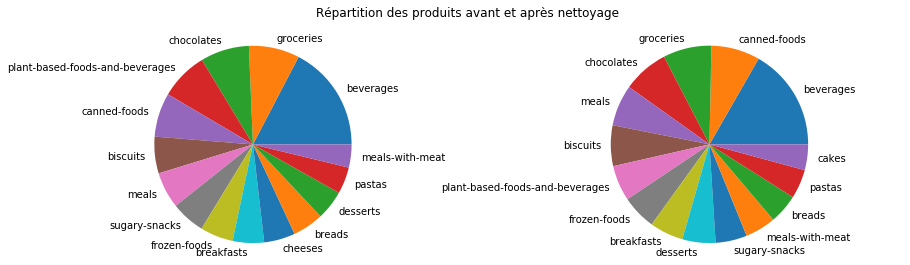

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
# catégories originales
orig_top_categories.plot.pie(ax=axes[0])
axes[0].axis('equal');
axes[0].set_ylabel('');
# catégories après nettoyage
top_categories = data['main_category'].dropna().value_counts().head(15)
top_categories.index = top_categories.index.str[3:] # élimine le préfixe
top_categories.plot.pie(ax=axes[1]);
axes[1].axis('equal');
axes[1].set_ylabel('');
fig.suptitle('Répartition des produits avant et après nettoyage');

Nous observons que la fréquence des principales catégories n'a pas beaucoup changé : le nettoyage du jeu de donnée n'a pas introduit de biais. Bien que notre nouveau jeu ne contienne que 30 % des données initiales, il reste représentatif.

## Sauvegarde du jeu de données final

In [85]:
print(", ".join(data.columns.tolist()))

code, product_name, brands_tags, labels_tags, additives_n, ingredients_from_palm_oil_n, nutrition_grade_fr, main_category, energy_100g, energy-from-fat_100g, fat_100g, saturated-fat_100g, monounsaturated-fat_100g, polyunsaturated-fat_100g, omega-3-fat_100g, trans-fat_100g, cholesterol_100g, carbohydrates_100g, sugars_100g, lactose_100g, starch_100g, polyols_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, alcohol_100g, vitamin-a_100g, vitamin-d_100g, vitamin-e_100g, vitamin-k_100g, vitamin-c_100g, vitamin-b1_100g, vitamin-b2_100g, vitamin-pp_100g, vitamin-b6_100g, vitamin-b9_100g, folates_100g, vitamin-b12_100g, biotin_100g, pantothenic-acid_100g, potassium_100g, calcium_100g, phosphorus_100g, iron_100g, magnesium_100g, zinc_100g, copper_100g, manganese_100g, selenium_100g, iodine_100g, fruits-vegetables-nuts_100g, cocoa_100g, nutrition-score-fr_100g, nutrition-score-uk_100g, main_brand


In [86]:
print(data.info(memory_usage='deep')) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91142 entries, 0 to 320770
Data columns (total 56 columns):
code                           91142 non-null object
product_name                   91142 non-null object
brands_tags                    85293 non-null object
labels_tags                    34896 non-null object
additives_n                    53338 non-null float64
ingredients_from_palm_oil_n    53338 non-null float64
nutrition_grade_fr             60973 non-null object
main_category                  61410 non-null object
energy_100g                    64117 non-null float64
energy-from-fat_100g           30 non-null float64
fat_100g                       47217 non-null float64
saturated-fat_100g             61922 non-null float64
monounsaturated-fat_100g       1176 non-null float64
polyunsaturated-fat_100g       1194 non-null float64
omega-3-fat_100g               650 non-null float64
trans-fat_100g                 364 non-null float64
cholesterol_100g               388 non-nu

In [87]:
data.to_csv(output_file, index=False, sep='\t')
size = os.path.getsize(output_file) / 1024**2
print(f'Taille du fichier : {size:0.2f} MB')

Taille du fichier : 15.96 MB
